# Mahalanobis distance

In [15]:
import numpy as np
import pandas as pd
import scipy as sp

import matplotlib.pyplot as plt

from pathlib import Path

In [2]:
def plot_test_distribution(test_dist, df_vector, path, file):

    import matplotlib.pyplot as plt

    x, y = np.mgrid[-3:9:.01, -3:9:.01]
    pos = np.dstack((x, y))

    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.contourf(x,y, test_dist.pdf(pos))
    ax.scatter(df_vector.X1, df_vector.X2, c='red', marker='x', s=5)
    ax.set_title('Mahalanobis distance between the datapoints (red) and the underlying distribution')

    plt.show()

In [3]:
def prepare_Mahalanobis_test(n_datapoints, path, file):
    '''
    # As a test, we compute the Mahalanobis distances of two vectors [2,2] and [-2, -2]
    # to a bivariate distribution of n_datapoints with a mean value: [3, 4]
    # and a covariance matrix [[ 2, -1], 
                               [-1,  2]]
    '''
    
    # prepare vector
    x1, x2 = [2,2], [-2, -2]
    vector = np.array([x1, x2])
    df_vector = pd.DataFrame({'X1': vector[:, 0], 'X2': vector[:, 1]})
    print('Vector=', df_vector)

    # prepare distribution
    import scipy as sp
    test_mean=np.array( [3, 4])
    test_cov=np.array([[2, -1], [-1, 2]])
    test_dist = sp.stats.multivariate_normal(mean=test_mean, cov=test_cov, seed=42)
    
    data = test_dist.rvs(n_datapoints)
    df_distrib = pd.DataFrame({'X1': data[:, 0], 'X2': data[:, 1]})
    print('Distribution (head) =')
    print(df_distrib[0:5])

    plot_test_distribution(test_dist, df_vector, None, None)

    return df_vector, df_distrib

In [4]:
def Mahalanobis_distance(df_vector, df_distrib, list_of_cols):

    # select data from dataframes
    # ---------------------------
    vector = pd.DataFrame(df_vector, columns=list_of_cols).to_numpy()
    distrib = pd.DataFrame(df_distrib, columns=list_of_cols).to_numpy()
    
    # Dealing with the distribution
    # -----------------------------
    
    # compute the mean
    distrib_mean = []
    for i in range(vector.shape[0]):  
        # we take the shape of vector, for later computing the difference vector - distrib_mean 
        distrib_mean.append(list(distrib.mean(axis=0)))

    # compute the covariance matrix
    # rowvar=False because each column represents a variable
    # alternative: cov_mat = np.cov(distrib.T) 
    cov_mat = np.cov(distrib, rowvar=False)
        
    # check that the covariance matrix is definite positive
    if is_pos_def(cov_mat):
        # compute the inverse of the covariance matrix
        inv_cov = np.linalg.inv(cov_mat)

        # check that the inverse covariance matrix is definite positive
        if is_pos_def(inv_cov):
            
    # compute Mahalanobis distance
    # ----------------------------
    
            # compute the difference (x-mu) 
            diff = vector - distrib_mean

            # compute the matrix product and take the sqrt 
            md = []
            for i in range(len(diff)):
                md.append(np.sqrt(diff[i].T.dot(inv_cov).dot(diff[i])))
    
        else:
            print("The inverse of the covariance matrix is not definite positive")
    else:
        print("The covariance matrix is not definite positive")

    result = df_vector.copy().assign(Mahalanobis = md)

    return result

def is_pos_def(A):
    if np.allclose(A, A.T):
        try:
            np.linalg.cholesky(A)
            return True
        except np.linalg.LinAlgError:
            return False
    else:
        return False

Vector=    X1  X2
0   2   2
1  -2  -2
Distribution (head) =
         X1        X2
0  2.293884  4.510580
1  3.283692  5.870198
2  3.121218  3.547662
3  1.608526  6.476791
4  3.958634  3.808662


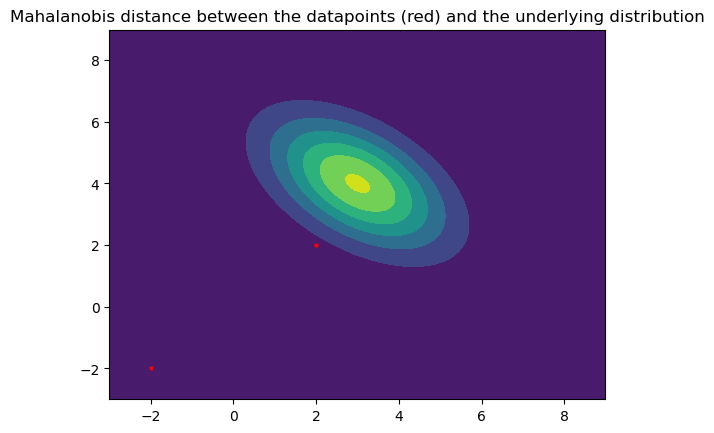

In [5]:
df_vector, df_distrib = prepare_Mahalanobis_test(100000, None, None)

In [6]:
test =  Mahalanobis_distance(df_vector, df_distrib, ['X1', 'X2'])
test

,X1,X2,Mahalanobis
0,2,2,2.160731
1,-2,-2,7.799678


In [7]:
# TBD save figure

In [8]:
stop

NameError: name 'stop' is not defined

# Using the Mahalanobis distance to identify outliers

##### For that purpose, we will use the New York airquality dataset, which measures daily the air quality in New York, from May to September 1973.

In [16]:
path_data = Path('/home/lemasle/PROJECTS/datasets/NY_air_quality_1973')

In [25]:
file = path_data / 'airquality.csv'
air_qual = pd.read_csv(file, index_col=0)
air_qual.describe()

,Ozone,Solar.R,Wind,Temp,Month,Day
count,116.000000,146.000000,153.000000,153.000000,153.000000,153.000000
mean,42.129310,185.931507,9.957516,77.882353,6.993464,15.803922
std,32.987885,90.058422,3.523001,9.465270,1.416522,8.864520
min,1.000000,7.000000,1.700000,56.000000,5.000000,1.000000
25%,18.000000,115.750000,7.400000,72.000000,6.000000,8.000000
50%,31.500000,205.000000,9.700000,79.000000,7.000000,16.000000
75%,63.250000,258.750000,11.500000,85.000000,8.000000,23.000000
max,168.000000,334.000000,20.700000,97.000000,9.000000,31.000000


In [35]:
# select only two variables and drop NaNs
data = air_qual[['Ozone','Temp']].dropna()
data.head()

,Ozone,Temp
1,41.0,67
2,36.0,72
3,12.0,74
4,18.0,62
6,28.0,66


In [51]:
meanx, meany = data.mean()
print(meanx, meany)
cov_mat = np.cov(data, rowvar=False)
print(cov_mat)

42.12931034482759 77.87068965517241
[[1088.20052474  218.52121439]
 [ 218.52121439   89.97443778]]


In [ ]:
Maha = Mahalanobis_distance(df_vector, df_distrib, ['X1', 'X2'])

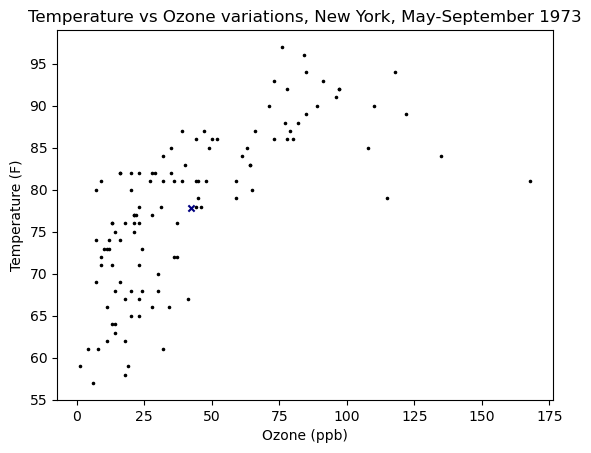

In [54]:
def NY_ozone_plot(data, meanx, meany, path, filename):
    
    fig = plt.figure()
    ax = fig.add_subplot(111)
    
    ax.scatter(data.Ozone, data.Temp, c='black', marker='.', s=10)
    ax.scatter(meanx, meany, c='navy', marker='x', s=20)
    ax.set_xlabel('Ozone (ppb)')
    ax.set_ylabel('Temperature (F)')
    ax.set_title('Temperature vs Ozone variations, New York, May-September 1973')


NY_ozone_plot(data, meanx, meany, None, None)

## Test datasets

In [9]:
data = { 'Price': [100000, 800000, 650000, 700000, 
               860000, 730000, 400000, 870000, 
               780000, 400000], 
     'Distance': [16000, 60000, 300000, 10000, 
                  252000, 350000, 260000, 510000, 
                  2000, 5000], 
     'Emission': [300, 400, 1230, 300, 400, 104, 
                  632, 221, 142, 267], 
     'Performance': [60, 88, 90, 87, 83, 81, 72,  
                     91, 90, 93], 
     'Mileage': [76, 89, 89, 57, 79, 84, 78, 99,  
                 97, 99] 
       } 
  
# Creating dataset 
dataset1 = pd.DataFrame(data,columns=['Price', 'Distance', 
                                'Emission','Performance', 
                                'Mileage']) 

In [12]:
test2 =  Mahalanobis_distance(dataset1, dataset1, ['Price', 'Distance', 
                                'Emission','Performance', 
                                'Mileage'])

In [13]:
test2

,Price,Distance,Emission,Performance,Mileage,Mahalanobis
0,100000,16000,300,60,76,2.460846
1,800000,60000,400,88,89,1.605946
2,650000,300000,1230,90,89,2.600486
3,700000,10000,300,87,57,2.735447
4,860000,252000,400,83,79,1.424043
5,730000,350000,104,81,84,1.542937
6,400000,260000,632,72,78,1.465424
7,870000,510000,221,91,99,2.217056
8,780000,2000,142,90,97,2.006377
9,400000,5000,267,93,99,2.573532


In [ ]:
def create_data(examples=50, features=5, upper_bound=10, outliers_fraction=0.1, extreme=False):
    '''
    This method for testing (i.e. to generate a 2D array of data)
    '''
    data = []
    magnitude = 4 if extreme else 3
    for i in range(examples):
        if (examples - i) <= round((float(examples) * outliers_fraction)):
            data.append(np.random.poisson(upper_bound ** magnitude, features).tolist())
        else:
            data.append(np.random.poisson(upper_bound, features).tolist())
    return np.array(data)

In [ ]:
dataset2 = create_data(15, 3, 10, 0.1)
print("data:\n {}\n".format(dataset2))

## Code

In [ ]:
X_test = np.array([[ 12,   7,   9],
          [  9,  16,   7],
          [ 14,  11,  10],
          [ 14,   5,   5],
          [ 12,   8,   7],
          [  8,   8,  10],
          [  9,  14,   8],
          [ 12,  12,  10],
          [ 18,  10,   6],
          [  6,  12,  11],
          [  4,  12,  15],
          [  5,  13,  10],
          [  8,   9,   8],
          [106, 116,  97],
          [ 90, 116, 114]] )